In [1]:
# Import Modules from the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Seed of the Random Number Generator
np.random.seed(1001)

### Let's simulate 100 coin flips:

In [3]:
p = 0.5
N = 100

In [4]:
rv = np.random.rand(10)

In [5]:
(rv < 0.7) * 2.5

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [6]:
rv = np.random.rand(N) <= p

In [7]:
rv.dtype

dtype('bool')

In [8]:
rv = rv.astype("float")

In [9]:
rv

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.])

In [10]:
result = rv.sum(axis=0)

In [11]:
result

44.0

### What happens, if we repeat this experiment 1000 times?

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 2.400e+01,
        3.500e+01, 5.900e+01, 1.300e+02, 2.450e+02, 4.160e+02, 7.160e+02,
        1.118e+03, 1.776e+03, 2.490e+03, 3.487e+03, 4.574e+03, 5.739e+03,
        7.011e+03, 8.177e+03, 8.837e+03, 9.059e+03, 9.043e+03, 8.425e+03,
        7.492e+03, 6.215e+03, 4.982e+0

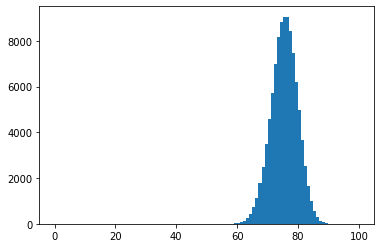

In [12]:
p = 0.75
N = 100

rv = np.random.rand(N,100000) <= p
result = rv.sum(axis=0)
plt.hist(result, bins=np.linspace(0,100,101))

### Can we do anything useful with this?

In [26]:
N = 100

In [27]:
x = np.random.rand(N)
y = np.random.rand(N)

In [28]:
x_line = np.linspace(0., 1., 100)
y_line = np.sqrt(1 - x_line*x_line)

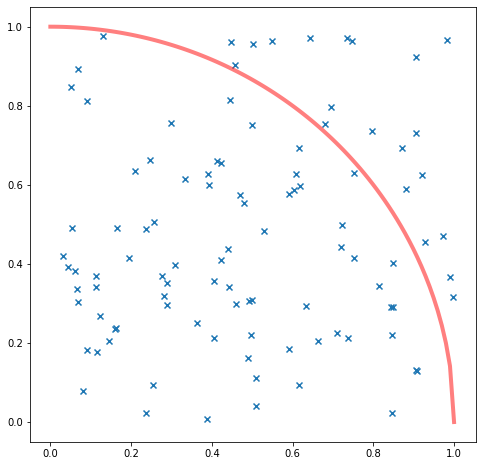

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y, marker="x")
ax.plot(x_line, y_line, "r", lw=4, alpha=0.5)

### From this sample we can estimate $\pi$

### $\frac{N_{Inside}}{N} \approx \frac{Area Circle}{Area Square} = \frac{\frac{1}{4} \pi r^2}{r^2} = \frac{\pi}{4}$

### $\Rightarrow \pi \approx 4 \cdot \frac{N_{Inside}}{N}$

In [17]:
z = x*x + y*y <= 1

In [18]:
pi_prediction = z.sum() / N * 4
pi_prediction

3.24

In [19]:
results_N = []
results_pi = []

N = 1
while N < 1_000_000:
    
    x = np.random.rand(N)
    y = np.random.rand(N)
    z = x*x + y*y <= 1
    pi_pred = z.sum() / N * 4
    #print(N, pi_pred, pi_pred - np.pi)
    
    results_N.append(N)
    results_pi.append(pi_pred)
    
    N = int(N*1.2 + 1)

Text(0, 0.5, 'absolute error')

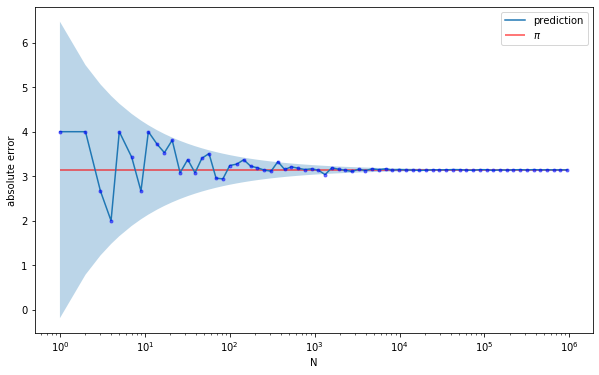

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_N, results_pi, label="prediction")
ax.plot(results_N, results_pi, ".", color="blue", alpha=0.5)
ax.fill_between(results_N, np.pi + np.power(results_N, -0.5)*3.33, np.pi - np.power(results_N, -0.5)*3.33, alpha=0.3)
ax.semilogx()
ax.hlines([np.pi], xmin=results_N[0], xmax=results_N[-1], color="red", alpha=0.7, label="$\pi$")
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("absolute error")

Text(0, 0.5, 'absolute error')

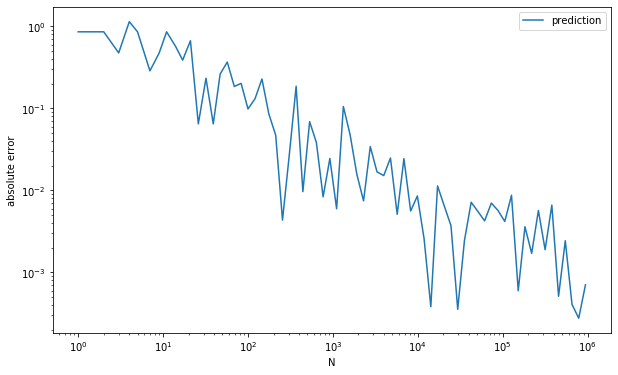

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_N, np.abs(np.asarray(results_pi) - np.pi), label="prediction")
ax.semilogx()
ax.semilogy()
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("absolute error")

Text(0, 0.5, 'absolute error')

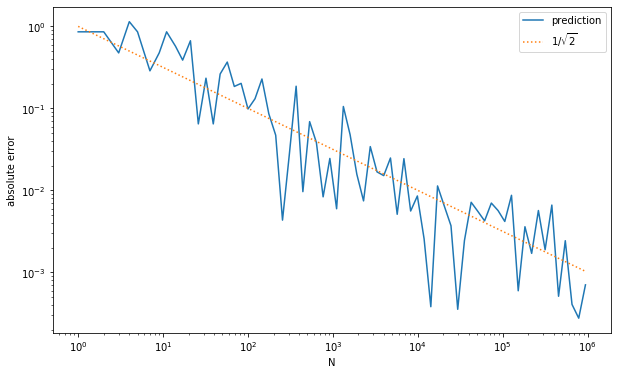

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_N, np.abs(np.asarray(results_pi) - np.pi), label="prediction")
ax.plot(np.asarray(results_N), 1./np.sqrt(np.asarray(results_N)), ':', label="$1/\sqrt{2}$")
ax.semilogx()
ax.semilogy()
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("absolute error")

We want to predict:    $\qquad \phi = \int f(x) p(x) dx = \mathbb{E}_p(f)$

Our MC-Estimator: $\qquad \hat{\phi} = \frac{1}{N} \sum_{i=1}^{N} f(x_i)$ 

Our sammples are drawn independent and identically distributed (i.i.d.): $ x_i \sim p, \quad p(x_i = x) = p(x), \qquad p(x_i, x_j) = p(x_i) p(x_j)$

Bias of our Estimator: \
\begin{equation}
\quad \mathbb{E} [\hat{\phi}] = \int \frac{1}{N} \sum_{i=1}^{N} f(x_i) p(x_i) dx_i = \sum_{i=1}^{N} \int \frac{1}{N} f(x_i) p(x_i) dx_i = \frac{1}{N} \sum_{i=1}^{N} \mathbb{E} [f(x_i)] = \phi \quad \rightarrow \hat{\phi} \text{ is unbiased!} 
\end{equation}

Variance of the Estimator:
\begin{equation}
\quad \mathbb{E} \left[\hat{\phi} - \mathbb{E} [\hat{\phi}] \right] = \mathbb{E} \left[ \frac{1}{N} \sum_{i=1}^{N} \left( f(x_i) - \phi \right)   \right]^2 
\end{equation}

\begin{eqnarray}
\quad \mathbb{E} \left[\hat{\phi} - \mathbb{E} [\hat{\phi}] \right] &=& \mathbb{E} \left[ \frac{1}{N} \sum_{i=1}^{N} \left( f(x_i) - \phi \right)   \right]^2 \\
\qquad &=& \frac{1}{N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} \mathbb{E}[f(x_i) f(x_j)] - \phi \mathbb{E}[f(x_i)] - \mathbb{E}[f(x_j) \phi + \phi^2 \\
\qquad &=&  \frac{1}{N^2} \sum_{i=1}^{N}  \left( \left( \sum_{i \neq j}  \phi^2 - 2 \phi^2 + \phi^2  \right)  + \mathbb{E} [f^2] - \phi^2\right)\\
\qquad &=&  \frac{1}{N^2} \sum_{i=1}^{N}  \left( \left( 0 \right) + var(f)\right)\\
\qquad &=&  \frac{1}{N}  var(f) = \mathcal{O}(N^{-1})
\end{eqnarray}